In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
data = pd.read_csv('machine_data.csv')
data.head()

,Machine_ID,Temperature,Run_Time,Downtime_Flag
0,M_24,105.22,10.39,1
1,M_8,75.15,1.15,0
2,M_26,96.33,14.71,0
3,M_38,96.94,16.52,0
4,M_36,114.62,16.17,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Machine_ID     1000 non-null   object 
 1   Temperature    1000 non-null   float64
 2   Run_Time       1000 non-null   float64
 3   Downtime_Flag  1000 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
data.describe()

,Temperature,Run_Time,Downtime_Flag
count,1000.000000,1000.000000,1000.00000
mean,90.505930,12.410670,0.50000
std,17.090923,6.700354,0.50025
min,60.010000,1.000000,0.00000
25%,75.535000,6.350000,0.00000
50%,91.370000,12.505000,0.50000
75%,105.142500,18.215000,1.00000
max,119.960000,23.990000,1.00000


In [7]:
data.isnull().sum()

Machine_ID       0
Temperature      0
Run_Time         0
Downtime_Flag    0
dtype: int64

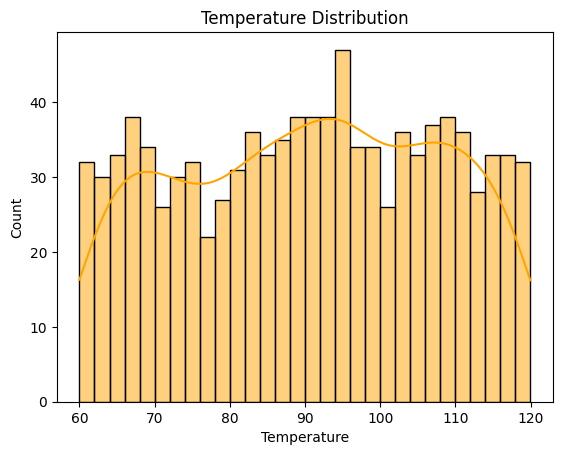

In [8]:
sns.histplot(data['Temperature'], kde=True, bins=30, color='orange')
plt.title('Temperature Distribution')
plt.show()

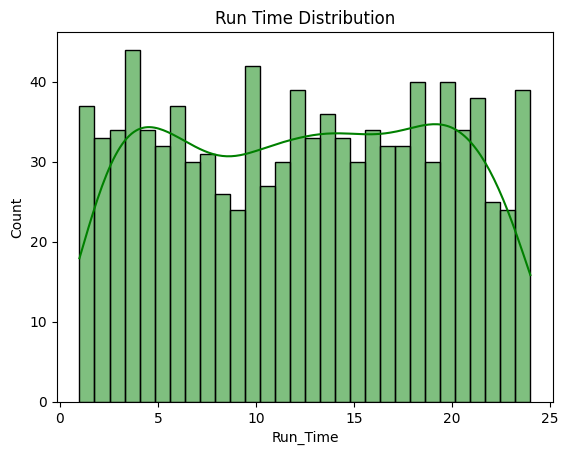

In [9]:
sns.histplot(data['Run_Time'], kde=True, bins=30, color='green')
plt.title('Run Time Distribution')
plt.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_14092\2428173743.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Downtime_Flag', data=data, palette='viridis')


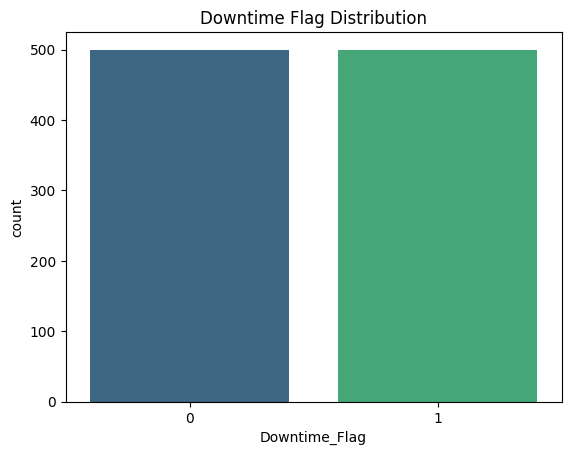

In [10]:
sns.countplot(x='Downtime_Flag', data=data, palette='viridis')
plt.title('Downtime Flag Distribution')
plt.show()

In [11]:
X = data[["Temperature", "Run_Time"]]
y = data["Downtime_Flag"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.545


In [16]:
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56       100
           1       0.55      0.52      0.53       100

    accuracy                           0.55       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.55      0.55      0.54       200



In [2]:
import joblib
joblib.dump(clf, 'trained_model.pkl')


NameError: name 'clf' is not defined